<a class="anchor" id="0.1"></a>
## Table of Content
***

0. [Step-00: Import Libraries](#0)

<!-- *** -->

1. [Step-01: Import Dataset](#1)
   - 1.1 [Data Overview](#1.1)
   - 1.2 [Missing Values](#1.2)
   - 1.3 [Numerical Features](#1.3)
   - 1.4 [Discrete Features](#1.4)
   - 1.5 [Continuous Features](#1.5)
   - 1.6 [Catagorical Features](#1.6)
   
<!-- *** -->

2. [Step-02: Data Engineering](#2)
   - 2.1 [Exploratory Data Analysis. (EDA)](#2.1)
     - 2.1.1 [Before Normalization with (Plotting)](#2.1.1)
     - 2.1.2 [Apply Yeo-Johnson transformation](#2.1.2)
     - 2.1.3 [After Normalization with (Plotting)](#2.1.3)
   - 2.2 [Data Wrangling](#2.2)
     - 2.2.1 [Features Scaling](#2.2.1)

<!-- *** -->

1. [Step-03: Data Cleaning or Organize](#3)
   - 3.1 [Remove Outliers](#3.1)

<!-- *** -->

4. [Step-04: Splitting (Training and Testing) Data](#4)

<!-- *** -->

5. [Step-05: Apply Techniques or Models](#5)
   - 5.1 [Decision Tree](#5.1)
   - 5.2 [Random Forest](#5.2)
   - 5.3 [Gaussian Naive Bayes](#5.3)
   - 5.4 [K-Nearest Neighbors](#5.4)
   - 5.5 [Logistic Regression](#5.5)

<!-- *** -->

6. [Step-06: Evaluate or Compare Models Accuracy](#6)

<!-- *** -->

7. [Apply Cross-Validation](#7)

<!-- *** -->

8. [Best Technique](#8)


## <span style="color:orange">Technique:
- </span> <span style="color:yellow">**Gaussian Naive Bayes**</span>
- </span> <span style="color:yellow">**Logistic Regression**</span>

### Problem:<span style="color:red"> **Classification**</span>

### Dataset: <span style="color:magenta">**IRIS-Flowers Prediction !**</span>

***

***

### <span style="color:cyan">Step: 00</span>: (Import Libraries) 

<a class="anchor" id="0"></a>

In [296]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### <span style="color:cyan">Step: 01</span>: (Import Dataset)

<a class="anchor" id="1"></a>

In [297]:
# import Dataset !

df = pd.read_csv('iris_flowers.csv')
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [298]:
df = df.drop('Unnamed: 0', axis=1)
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


***

#### Data Overview

<a class="anchor" id="1.1"></a>


In [299]:
df.shape

(150, 5)

In [300]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [302]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [303]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [304]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [305]:
df.min()

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [306]:
df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

#### Missing Values

<a class="anchor" id="1.2"></a>


In [307]:
for feature in df:
    if df[feature].isnull().sum()>1:
        print(feature,":", np.round(df[feature].isnull().mean(),4),'%')
    
else:
     print("There is no Null Values")

There is no Null Values


#### Numerical Features

<a class="anchor" id="1.3"></a>


In [308]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The length of Numerical_values is :",len(numerical_features))
df[numerical_features].head()

The length of Numerical_values is : 4


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Discrete Features 

<a class="anchor" id="1.4"></a>


In [309]:
discrete_Feature = [feature for feature in numerical_features if len(df[feature].unique())<25]

print("The Discrete feature is :",len(discrete_Feature))
discrete_Feature

The Discrete feature is : 2


['sepal_width', 'petal_width']

#### Continuous Features

<a class="anchor" id="1.5"></a>


In [310]:
continous_Feature = [feature for feature in numerical_features if feature not in discrete_Feature]

print("The Continous feature is :",len(continous_Feature))
continous_Feature

The Continous feature is : 2


['sepal_length', 'petal_length']

In [311]:
df[continous_Feature].head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


#### Categorical Features

<a class="anchor" id="1.6"></a>


In [312]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature

1


['species']

In [313]:
df[categorical_feature].head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


---

### <span style="color:cyan">Step: 02</span>: Data Engineering

<a class="anchor" id="2"></a>

#### <span style="color:blue">**Exploratory Data Analysis. (EDA)**</span>


<a class="anchor" id="2.1"></a>

In [314]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

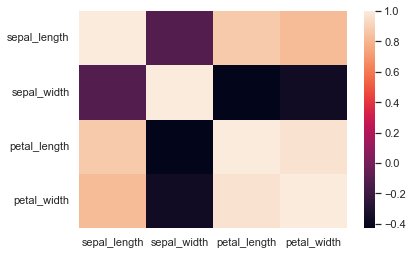

In [315]:
sns.heatmap(df.corr())

<AxesSubplot:>

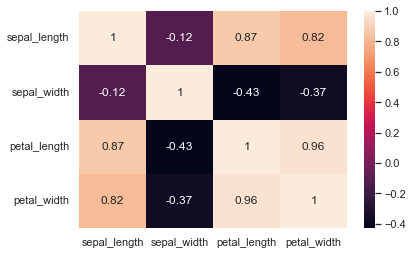

In [316]:
sns.heatmap(df.corr(), annot=True)

***

In [ ]:
conti = [i for i in df.columns if i not in ['species']]

##### Before Normalization with (Plotting)

<a class="anchor" id="2.1.1"></a>

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


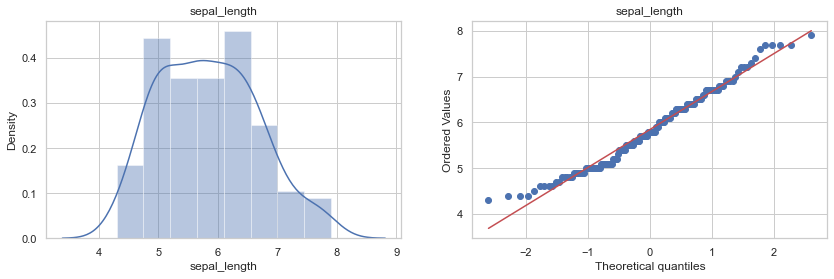

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


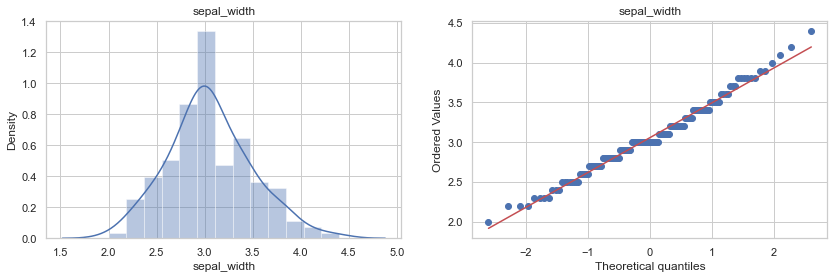

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


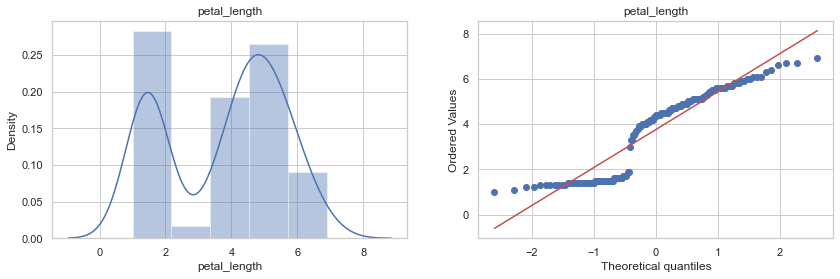

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


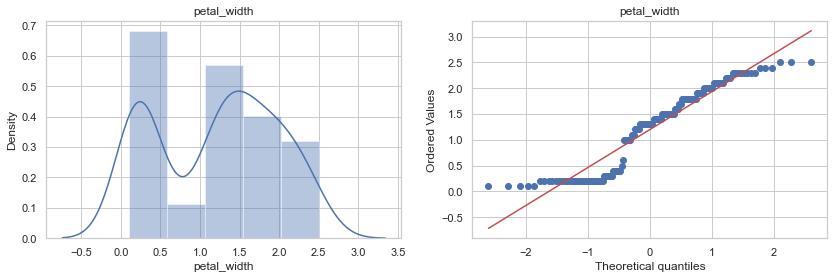

In [318]:
# Plotting the distplots without any transformation

for col in df[conti]:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [319]:
df[conti].columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [320]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

##### Apply Yeo-Johnson transform

<a class="anchor" id="2.1.2"></a>

In [321]:
features_normalize =[n for n in df.columns if n not in ['species']]
pt = PowerTransformer()
df[features_normalize] = pt.fit_transform(df[features_normalize]+0.00001)

In [322]:
df[features_normalize] = pd.DataFrame(df[features_normalize])
pd.DataFrame({'cols':df[features_normalize].columns,'Yeo_Johnson_lambdas':pt.lambdas_})

,cols,Yeo_Johnson_lambdas
0,sepal_length,-0.321225
1,sepal_width,0.039073
2,petal_length,1.093220
3,petal_width,0.840485


##### After Normalization with (Plotting)

<a class="anchor" id="2.1.3"></a>

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


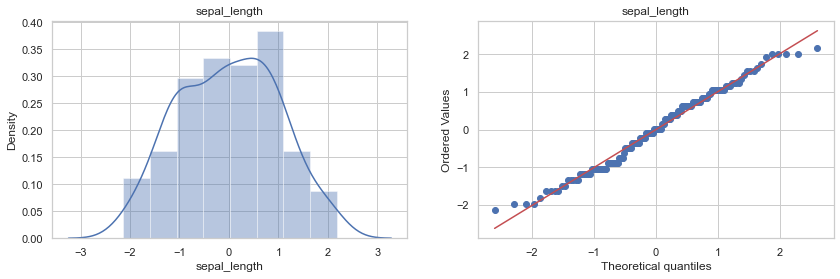

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


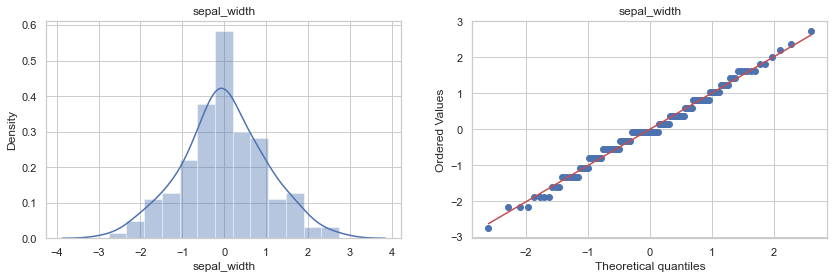

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


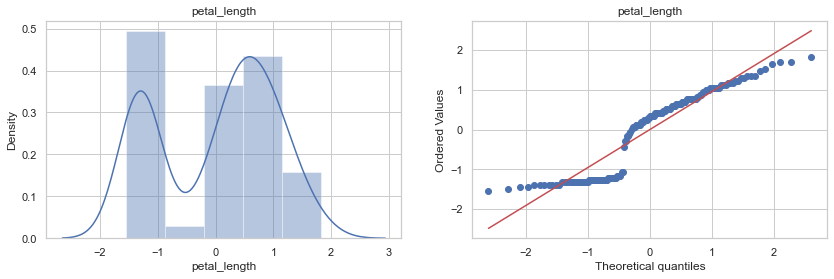

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


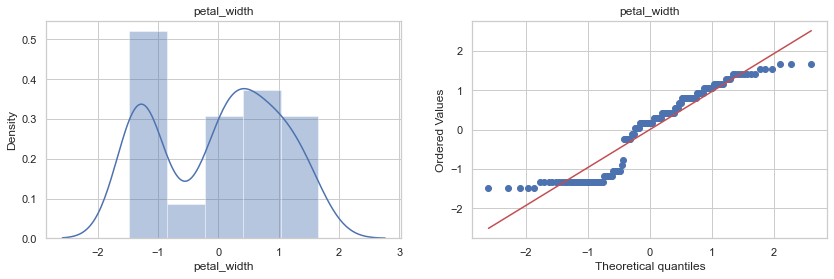

In [323]:
# Plotting the distplots with after transformation

for col in df[conti]:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [324]:
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

***

#### <span style="color:blue">**Data Wrangling**</span>

<a class="anchor" id="2.2"></a>

##### Feature Scaling

<a class="anchor" id="2.2.1"></a>

In [325]:
features_scale =[i for i in df.columns if i not in ['species']]
scaler = MinMaxScaler()
df[features_scale] = scaler.fit_transform(df[features_scale])

In [326]:
df[features_scale].head(1)


,sepal_length,sepal_width,petal_length,petal_width
0,0.28787,0.687356,0.063207,0.046112


In [327]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.287870,0.687356,0.063207,0.046112,setosa
1,0.220778,0.486563,0.063207,0.046112,setosa
2,0.150612,0.569627,0.047306,0.046112,setosa
3,0.114297,0.528582,0.079170,0.046112,setosa
4,0.254693,0.724927,0.063207,0.046112,setosa


***

### <span style="color:cyan">Step: 03</span>: Data Cleaned or Organize

<a class="anchor" id="3"></a>

#### Remove Outliers

<a class="anchor" id="3.1"></a>

In [328]:
outliers =[n for n in df.columns if n not in ['species']]

In [329]:
print("Before Cleaning:", df.shape)

Before Cleaning: (150, 5)


Before Removing Outliers


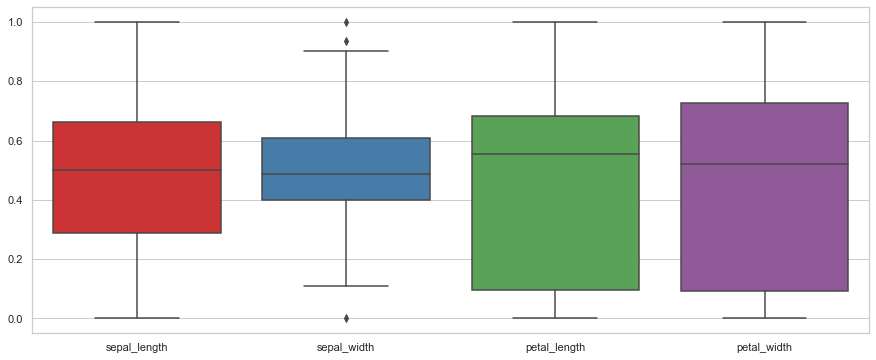

In [330]:
print("Before Removing Outliers")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df[outliers],
            palette="Set1")
plt.show()            

***

Before Removing (sepal_width) outliers


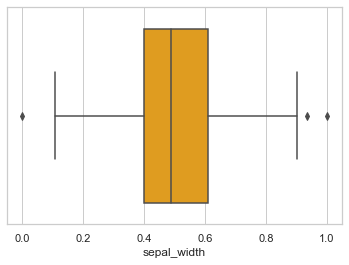

After Removing (sepal_width) outliers


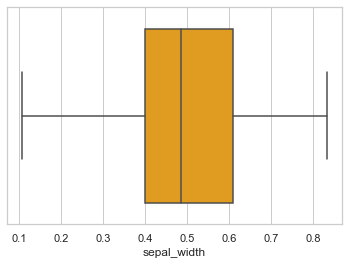

In [331]:
# sepal_width

print("Before Removing (sepal_width) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="sepal_width",
            color="orange")
plt.show()  
           
df = df[df['sepal_width']<0.84] 
df = df[df['sepal_width']>0.01] 


print("After Removing (sepal_width) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="sepal_width",
            color="orange")
plt.show()  

In [332]:
print("Shape:", df.shape)

Shape: (145, 5)


***

In [333]:
print("After Cleaning:", df.shape)

After Cleaning: (145, 5)


After Removing Outliers


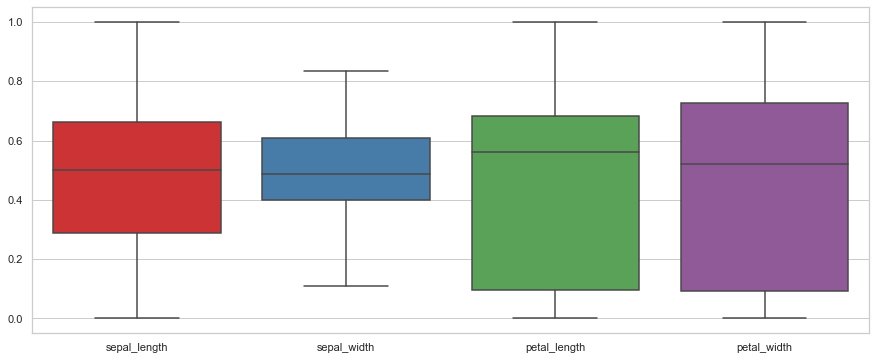

In [334]:
print("After Removing Outliers")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df[outliers],
            palette="Set1")
plt.show()            

***

### <span style="color:cyan">Step: 04</span>: Splitting Dataset into (Training and Testing) Data 

<a class="anchor" id="4"></a>

In [335]:
X = df.drop(['species'], axis=1)
y = df[['species']]

In [336]:
X.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
103,0.637195,0.443523,0.770423,0.725055
118,0.959554,0.307730,1.000000,0.922423
48,0.352117,0.761722,0.079170,0.046112
18,0.472876,0.797772,0.111272,0.091614
70,0.529740,0.569627,0.631182,0.725055


In [337]:
y.sample(5)

,species
136,virginica
38,setosa
143,virginica
18,setosa
20,setosa


In [338]:
y['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***

### <span style="color:cyan">Step: 05</span>: Apply Techniques !

<a class="anchor" id="5"></a>

### **Model Building**

<a class="anchor" id="5"></a>

#### <span style="color:yellow">Decision Tree Classifier</span>

<a class="anchor" id="5.1"></a>

In [340]:
# DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train, y_train)
dt_model

DecisionTreeClassifier()

In [341]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

# Decision tree
dt_score = np.round(accuracy_score(y_test, y_pred_dt)*100, 3)
print("Decision tree:", dt_score)

Decision tree: 89.655


#### <span style="color:yellow">Random Forest Classifier</span>

<a class="anchor" id="5.2"></a>

In [342]:
# RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1).fit(X_train, y_train)
rf_model

C:\Users\fahad\AppData\Local\Temp\ipykernel_19268\110523400.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier(n_estimators=1).fit(X_train, y_train)


RandomForestClassifier(n_estimators=1)

In [343]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

# Random forest
rf_score = np.round(accuracy_score(y_test, y_pred_rf)*100, 3)
print("Random forest:", rf_score)

Random forest: 86.207


#### <span style="color:yellow">Gaussian Naive Bayes</span>

<a class="anchor" id="5.3"></a>

In [344]:
# GaussianNaiveBayes

gnb_model = GaussianNB().fit(X_train, y_train)
gnb_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [345]:
y_pred_gnb = gnb_model.predict(X_test)
y_pred_gnb

# Gussian Naive Bays
gnb_score = np.round(accuracy_score(y_test, y_pred_gnb)*100, 3)
print("GussianNB:", gnb_score)

GussianNB: 93.103


#### <span style="color:yellow">K-Nearest Neighbors Classifier</span>

<a class="anchor" id="5.4"></a>

In [346]:
# KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train, y_train)
knn_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [347]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

# K_Nearest Neighbours 
knn_score = np.round(accuracy_score(y_test, y_pred_knn)*100, 3)
print("KNN:", knn_score)

KNN: 89.655


#### <span style="color:yellow">Logistic Regression</span>

<a class="anchor" id="5.5"></a>

In [348]:
# LogisticRegression

lr_model = LogisticRegression().fit(X_train, y_train)
lr_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [349]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

# Logistic Regression 
lr_score = np.round(accuracy_score(y_test, y_pred_lr)*100, 3)
print("Logistic Regression:", lr_score)

Logistic Regression: 93.103


***

### <span style="color:cyan">Step: 06</span>: Evaluate or Compare Models Accuracy

<a class="anchor" id="6"></a>

In [350]:
data={'Decision tree'            :[dt_score],
      'Random Forest'            :[rf_score],
      'Gaussian_NB'              :[gnb_score],
      'KNN'                      :[knn_score],
      'Logistic Regression'      :[lr_score]
}

In [351]:
Evaluation = pd.DataFrame(data, index=['Score'])
Evaluation

,Decision tree,Random Forest,Gaussian_NB,KNN,Logistic Regression
Score,89.655,86.207,93.103,89.655,93.103


***

#### <span style="color:magenta">**Apply Cross-Validation**</span>

<a class="anchor" id="7"></a>

In [352]:
dt_validate = np.round(cross_val_score(dt_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of DT:", dt_validate)

After cross validation of DT: 95.172


***

In [353]:
data1={'Decision tree'            :[dt_score],
      'Cross-validate DT'        :[dt_validate]
}

In [354]:
Evaluation = pd.DataFrame(data1, index=['Score'])
Evaluation

,Decision tree,Cross-validate DT
Score,89.655,95.172


***

In [355]:
rf_validate = np.round(cross_val_score(rf_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of RF:", rf_validate)

After cross validation of RF: 95.172


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

***

In [356]:
data2={'Random Forest'            :[rf_score],
      'Cross-validate RF'         :[rf_validate]
}

In [357]:
Evaluation = pd.DataFrame(data2, index=['Score'])
Evaluation

,Random Forest,Cross-validate RF
Score,86.207,95.172


***

In [358]:
gnb_validate = np.round(cross_val_score(gnb_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of GNB:", gnb_validate)

After cross validation of GNB: 95.172


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

***

In [359]:
data3={'Gaussian Naive Bayes'             :[gnb_score],
      'Cross-validate GNB'                :[gnb_validate]
}

In [360]:
Evaluation = pd.DataFrame(data3, index=['Score'])
Evaluation

,Gaussian Naive Bayes,Cross-validate GNB
Score,93.103,95.172


***

In [361]:
knn_validate = np.round(cross_val_score(knn_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of KNN:", knn_validate)

After cross validation of KNN: 95.862


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

***

In [362]:
data4={'K-Nearest Neighbours'             :[knn_score],
      'Cross-validate KNN'                :[knn_validate]
}

In [363]:
Evaluation = pd.DataFrame(data4, index=['Score'])
Evaluation

,K-Nearest Neighbours,Cross-validate KNN
Score,89.655,95.862


***

In [364]:
lr_validate = np.round(cross_val_score(lr_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of LR:", lr_validate)

After cross validation of LR: 92.414


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

***

In [365]:
data5={'Logistic Regression'              :[lr_score],
      'Cross-validate LR'                 :[lr_validate]
}

In [366]:
Evaluation = pd.DataFrame(data5, index=['Score'])
Evaluation

,Logistic Regression,Cross-validate LR
Score,93.103,92.414


***

#### <span style="color:green">**Best Technique**</span>:
- <span style="color:yellow">**Gaussian Naive Bayes**</span>
- <span style="color:yellow">**Logistic Regression**</span>

<a class="anchor" id="8"></a>

In [369]:
data_best={'Gaussian Naive Bayes'            :[gnb_score],
           'Cross-validate GNB'              :[gnb_validate],
           
           'Logistic Regression'             :[lr_score],
           'Cross-validate LR'               :[lr_validate]
}

In [370]:
Evaluation = pd.DataFrame(data_best, index=['Score'])
Evaluation

,Gaussian Naive Bayes,Cross-validate GNB,Logistic Regression,Cross-validate LR
Score,93.103,95.172,93.103,92.414


***

***

***